In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import pairwise_distances
%matplotlib inline

In [2]:
# First load the data
itm_to_id = pd.read_csv('grocery/item_to_id.csv')
purchase_hist = pd.read_csv('grocery/purchase_history.csv')

In [3]:
# Next, do a quick inspection of the tables and the data types
itm_to_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
Item_name    48 non-null object
Item_id      48 non-null int64
dtypes: int64(1), object(1)
memory usage: 840.0+ bytes


In [4]:
itm_to_id.head()

,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39


In [5]:
purchase_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39474 entries, 0 to 39473
Data columns (total 2 columns):
user_id    39474 non-null int64
id         39474 non-null object
dtypes: int64(1), object(1)
memory usage: 616.9+ KB


In [6]:
purchase_hist.head()

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


Q1. Which customer brought the most items?

In [7]:
purchase_hist['number_of_items'] = purchase_hist.id.apply((lambda x: len(x.split(','))))
purchase_hist.groupby('user_id')['number_of_items'].sum().sort_values(ascending=False)

user_id
269335     72
367872     70
599172     64
397623     64
377284     63
1485538    62
917199     62
718218     60
653800     60
828721     58
1341188    58
920002     56
996380     56
1100981    55
80215      55
957925     54
1493728    54
764759     54
364868     54
765694     54
655779     54
1199670    54
31625      54
1286028    54
64998      53
68282      53
1071626    53
1000683    53
1310896    52
151926     52
           ..
1093281     1
164101      1
163889      1
72910       1
1215832     1
582116      1
1396633     1
922364      1
73311       1
161402      1
268012      1
601146      1
1395281     1
984470      1
71909       1
420197      1
1333210     1
765381      1
981233      1
587485      1
263204      1
168337      1
26600       1
422261      1
1099222     1
422843      1
170709      1
1210831     1
170979      1
920582      1
Name: number_of_items, dtype: int64

**User 269335 purchased the most items.**

Q2. For each item, which customer bought that item the most?

In [8]:
'''
Create a new dataframe that has 3 columns:
 - user_id: the user id
 - id: the item id
 - count: column of 1s
'''
user_id = []
item_id = []
count = []
for row in purchase_hist[['user_id','id']].iterrows():
    items = row[1][1].split(',')
    for itm in items:
        item_id.append(itm)
        user_id.append(row[1][0])
        count.append(1)
itm_usr = pd.DataFrame({'id': item_id, 'user_id': user_id, 'count':count})

In [9]:
itm_usr.head()

,count,id,user_id
0,1,27,222087
1,1,26,222087
2,1,6,1343649
3,1,47,1343649
4,1,17,1343649


In [10]:
# Aggregate the itm_user table by the item id and the user id to get the number of times each user purchased each item
itm_usr_counts = itm_usr.groupby(['id','user_id'])['count'].sum()

In [11]:
'''
Finally create another data frame that shows the users that bought each item the most. Two columns:
- frequent_users: The user(s) that purchased the item the most
- itm_id: The item id
'''
items = itm_usr.id.unique()
freq_user = []
for itm in items:
    freq_user.append(itm_usr_counts[itm][itm_usr_counts[itm] == itm_usr_counts[itm].max()].index.values.tolist())
itm_usr_freq = pd.DataFrame({'itm_id':items, 'frequent user(s)':freq_user })

In [12]:
itm_usr_freq

,frequent user(s),itm_id
0,[956666],27
1,"[967573, 1341188]",26
2,"[334664, 1151741]",6
3,"[384935, 1303056, 1374100]",47
4,"[366155, 463073, 1089642, 1275324]",17
5,[917199],18
6,"[557904, 791038]",12
7,[920002],23
8,[1199670],22
9,[996380],43


Q3. Cluster items based on user co-purchase history.

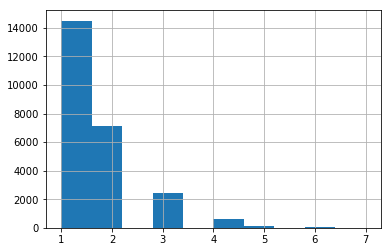

In [13]:
# Let's see how many times users visit the site to purchase groceries
purchase_hist.groupby('user_id')['id'].count().hist()

In [14]:
# Remove the outliers (i.e.) the users who visited the site more than 3 times
user_freq = purchase_hist.groupby('user_id')['id'].count()
user_freq = pd.DataFrame({'user_id': user_freq.index, 'visits': user_freq.values})
normal_users = user_freq[user_freq.visits < 3]['user_id'].values.tolist()
cleaned_hist = purchase_hist[purchase_hist.user_id.isin(normal_users)]

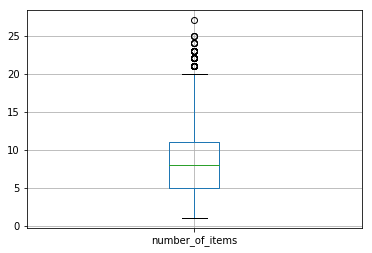

In [15]:
# Let's create a boxplot of the number of grocery items purchased during a site visit.
cleaned_hist.boxplot(column='number_of_items')

In [16]:
# Let's remove the outliers. Since we're interested in clustering by co-purchases, remove records with only 1 item purchased as well.
cleaned_hist = cleaned_hist[(cleaned_hist.number_of_items >= 2) & (cleaned_hist.number_of_items < 20)]

In [17]:
'''
Create a 48 by 48 matrix of co-purchase probabilities. Each cell M[i,j] in the matrix will show the conditional probability
of also purchasing item j given that item i is purchased.
'''

# First compute the total number of items each item was purchased
item_ids = sorted([int(s) for s in itm_usr.id.unique()])
itm_purchase_freq = {}
for row in cleaned_hist.id:
    items = [int(s) for s in row.split(',')]
    for i in items:
        if i not in itm_purchase_freq:
            itm_purchase_freq[i] = 1
        else:
            itm_purchase_freq[i] += 1

In [18]:
# Initialize the probability matrix
itm_prob_mat = np.identity(len(item_ids))
itm_pair_freq = np.zeros((len(item_ids),len(item_ids)))

In [19]:
# Compute the number of times each possible 2 item combination of purchases occurred.
for row in cleaned_hist.id:
    items = [int(s) for s in row.split(',')]
    for a in range(len(items)):
        i = items[a]-1
        for b in range(a+1, len(items)):
            j = items[b]-1
            itm_pair_freq[i][j] += 1
            itm_pair_freq[j][i] += 1

In [20]:
# Compute the probability matrix
for row in xrange(len(item_ids)):
    for col in xrange(len(item_ids)):
        if row == col:
            continue
        itm_prob_mat[row][col] = itm_pair_freq[row][col] / itm_purchase_freq[row+1]

In [21]:
'''
Perform Kmeans clustering on the probability matrix to form the clusters. We'll use the Elbow method to determine the
optimal value for k.
'''

# We'll use the function below to compute the within cluster variance for each cluster.
def computeWCV(clabels,n_clusters):
    wcv = 0
    for i in xrange(n_clusters):
        clust = itm_prob_mat[clabels == i]
        for j in xrange(len(clust)):
            for k in xrange(j,len(clust)):
                wcv += pairwise_distances(clust[j].reshape(1,-1),clust[k].reshape(1,-1))
    return 0.5 * wcv

In [22]:
# Perform k means clustering several times with different values for k. Create an elbow plot to find the optimal k parameter.
wcvdata = []
for i in xrange(3,20):
    Km = KMeans(n_clusters=i,max_iter=1000)
    Km.fit(itm_prob_mat)
    wcvdata.append(computeWCV(Km.labels_,i)[0][0])

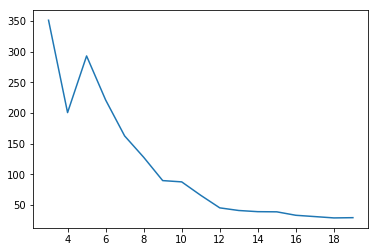

In [23]:
plt.plot(range(3,20),wcvdata)

In [24]:
itm_to_id = itm_to_id.set_index('Item_id')
d = itm_to_id.to_dict()

In [25]:
# Judging from the elbow plot, 12 is the optimal value for k. Now lets see what the clusters look like!
num_clusters = 12
Km = KMeans(n_clusters=num_clusters,max_iter=1000)
Km.fit(itm_prob_mat)

clusters = []
for i in xrange(num_clusters):
    clusters.append([])

for i in xrange(48):
    l = Km.labels_[i]
    clusters[l].append(d['Item_name'][i+1])

In [26]:
for i in xrange(12):
    print "Cluster #{0}:{1}".format(i+1, clusters[i])

Cluster #1:['waffles']
Cluster #2:['laundry detergent', 'dishwashing\xc2\xa0']
Cluster #3:['grapefruit', 'cherries', 'apples', 'berries', 'bananas']
Cluster #4:['bagels', 'tortillas', 'dinner rolls', 'sandwich loaves']
Cluster #5:['butter', 'eggs', 'milk', 'cheeses', 'yogurt']
Cluster #6:['spaghetti sauce', 'canned vegetables', 'ketchup']
Cluster #7:['lettuce', 'carrots', 'cucumbers', 'broccoli', 'cauliflower']
Cluster #8:['soda', 'tea', 'juice', 'coffee']
Cluster #9:['sandwich bags', 'aluminum foil', 'paper towels', 'toilet paper']
Cluster #10:['sugar', 'pet items', 'baby items', 'cereals', 'shaving cream', 'frozen vegetables', 'flour', 'pasta', 'ice cream']
Cluster #11:['poultry', 'beef', 'pork']
Cluster #12:['shampoo', 'hand soap', 'soap']
